# Task 2 -  Air Pollution Model

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [2]:
# load dataset
ap_data=pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [3]:
ap_data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
ap_data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [6]:
ap_data.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [7]:
ap_data['pm2.5'].fillna(ap_data[ "pm2.5"].mean(),inplace=True)

In [8]:
ap_data.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [9]:
# Encoding categorical variable
cat_values=[]
cont_values=[]
for columns in ap_data.columns:
    if ap_data[columns].nunique()<=10:
        cat_values.append(columns)
    else:
        cont_values.append(columns)

In [10]:
cat_values

['year', 'cbwd']

In [11]:
cont_values

['No',
 'month',
 'day',
 'hour',
 'pm2.5',
 'DEWP',
 'TEMP',
 'PRES',
 'Iws',
 'Is',
 'Ir']

In [12]:
ap_data['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [13]:
ap_data1=pd.get_dummies(ap_data,columns=cat_values,drop_first=True)

In [14]:
ap_data1.head()

,No,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,year_2011,year_2012,year_2013,year_2014,cbwd_NW,cbwd_SE,cbwd_cv
0,1,1,1,0,98.613215,-21,-11.0,1021.0,1.79,0,0,0,0,0,0,1,0,0
1,2,1,1,1,98.613215,-21,-12.0,1020.0,4.92,0,0,0,0,0,0,1,0,0
2,3,1,1,2,98.613215,-21,-11.0,1019.0,6.71,0,0,0,0,0,0,1,0,0
3,4,1,1,3,98.613215,-21,-14.0,1019.0,9.84,0,0,0,0,0,0,1,0,0
4,5,1,1,4,98.613215,-20,-12.0,1018.0,12.97,0,0,0,0,0,0,1,0,0


In [15]:
# scaling numerical variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ap_data1[cont_values]=ss.fit_transform(ap_data1[cont_values])

# EDA

Text(0, 0.5, 'counts')

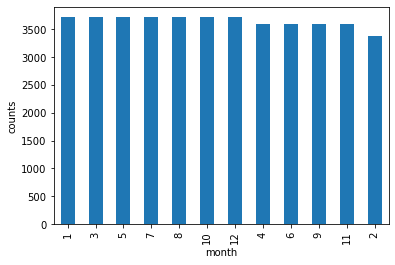

In [16]:
ap_data['month'].value_counts().plot.bar()
plt.xlabel('month')
plt.ylabel('counts')

<AxesSubplot:xlabel='pm2.5', ylabel='count'>

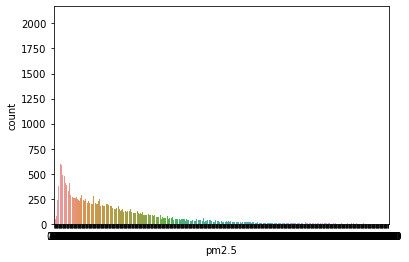

In [17]:
sns.countplot(x=ap_data['pm2.5'],data=ap_data)

<AxesSubplot:xlabel='cbwd', ylabel='Count'>

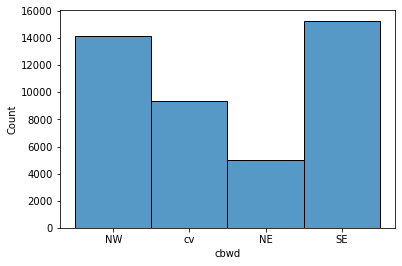

In [18]:
sns.histplot(data=ap_data['cbwd'])

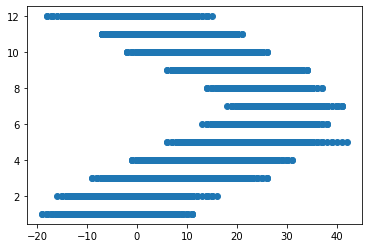

In [19]:
plt.scatter(x=ap_data['TEMP'],y=ap_data['month'])

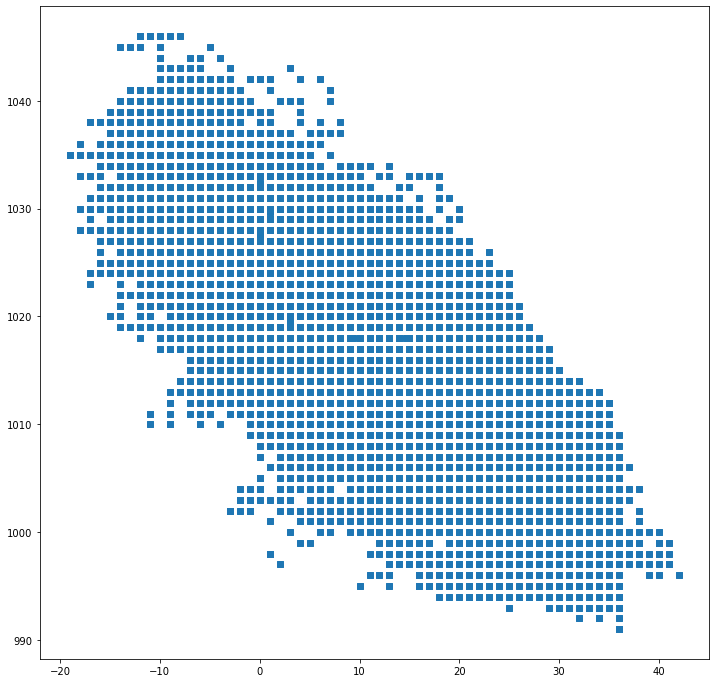

In [20]:
plt.figure(figsize=(12,12))
plt.scatter(x=ap_data['TEMP'],y=ap_data['PRES'],marker='s')

# Model implementation

In [21]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [22]:
X=ap_data1.drop('pm2.5',axis=1)
Y=ap_data1['pm2.5']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [24]:
X_train

,No,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir,year_2011,year_2012,year_2013,year_2014,cbwd_NW,cbwd_SE,cbwd_cv
11652,-0.810970,-0.441796,-1.673744,0.072232,-0.264475,1.028938,-0.530517,3.857241,-0.069353,-0.137667,1,0,0,0,1,0,0
16602,-0.419693,1.298074,0.826448,0.939010,-0.888034,-1.020498,1.417172,-0.459890,-0.069353,-0.137667,1,0,0,0,0,1,0
22761,0.067149,0.428139,-1.105519,-0.361158,1.606202,1.438826,-0.627901,-0.441894,-0.069353,-0.137667,0,1,0,0,0,0,0
3092,-1.487602,-0.441796,-0.764584,1.227936,-0.610897,0.455096,-0.725286,0.264364,-0.069353,-0.137667,0,0,0,0,1,0,0
8008,-1.099013,1.298074,1.621963,0.650084,-0.125907,-0.856543,-0.043595,-0.459890,-0.069353,-0.137667,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,1.724107,1.588052,1.281028,1.083473,-0.749466,-1.020498,0.930250,-0.424097,-0.069353,-0.137667,0,0,0,1,0,0,1
32511,0.837846,0.718117,0.030932,0.505621,0.636221,1.110916,-0.725286,-0.272128,-0.069353,-0.137667,0,0,1,0,0,1,0
5192,-1.321606,0.428139,-1.219164,-0.505621,1.259780,1.028938,-1.017439,-0.021778,-0.069353,-0.137667,0,0,0,0,1,0,0
12172,-0.769866,-0.441796,0.826448,-1.083473,0.220515,0.127186,-0.433132,-0.406101,-0.069353,-0.137667,1,0,0,0,0,1,0


In [25]:
Y_train

11652   -0.552164
16602   -0.897175
22761   -0.196024
3092    -0.184895
8008     1.540159
           ...   
43723    2.552933
32511   -0.685717
5192    -0.730234
12172   -0.229412
33003    0.983690
Name: pm2.5, Length: 35059, dtype: float64

In [26]:
X_test

,No,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir,year_2011,year_2012,year_2013,year_2014,cbwd_NW,cbwd_SE,cbwd_cv
19638,-0.179711,-1.021753,1.508318,-0.794547,-0.195191,-0.364679,-0.335748,-0.459890,-0.069353,-0.137667,0,1,0,0,0,0,1
35311,1.059174,-1.601710,-0.537294,-0.650084,-1.511594,-1.922250,1.417172,-0.397303,-0.069353,-0.137667,0,0,0,1,1,0,0
1113,-1.644033,-1.311731,0.030932,-0.361158,-1.442309,-1.594341,1.611941,-0.218539,-0.069353,-0.137667,0,0,0,0,1,0,0
17035,-0.385467,1.588052,-0.537294,1.083473,-0.818750,-0.446656,0.930250,0.666483,-0.069353,-0.137667,1,0,0,0,1,0,0
26039,0.326261,1.588052,0.485512,1.661325,-0.472328,-1.348408,1.125019,-0.459890,6.506427,-0.137667,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35291,1.057593,-1.601710,-0.650939,-0.072232,-1.719447,-1.184453,1.514556,-0.442094,-0.069353,-0.137667,0,0,0,1,0,0,1
33164,0.889462,1.008096,-0.310003,1.227936,0.566937,0.127186,0.248559,-0.459890,-0.069353,-0.137667,0,0,1,0,0,0,1
34660,1.007715,1.588052,-0.082713,-1.083473,-1.511594,-1.430386,1.611941,-0.280926,-0.069353,-0.137667,0,0,1,0,1,0,0
18795,-0.246346,-1.311731,0.826448,-1.227936,-1.165172,-1.594341,1.027634,-0.379306,-0.069353,-0.137667,0,1,0,0,1,0,0


In [27]:
Y_test

19638   -0.207154
35311    0.404962
1113    -0.808140
17035   -0.574423
26039    2.397121
           ...   
35291   -0.418612
33164   -0.440870
34660   -0.630070
18795   -0.919434
18895    0.816749
Name: pm2.5, Length: 8765, dtype: float64

In [28]:
print(X_train.shape)

(35059, 17)


In [29]:
print(X_test.shape)

(8765, 17)


# Ridge Regressor

In [30]:
RR = Ridge(alpha=0.1)
RR.fit(X_train,Y_train)
predicted_train_RR=(RR.predict(X_train))
predicted_test_RR=(RR.predict(X_test))

# Random forest regressor

In [31]:
regressor=RandomForestRegressor(random_state=0,
                                n_estimators=100,
                                max_depth=5,
                                min_samples_split=4,
                                bootstrap=True)
regressor.fit(X_train,Y_train)
predicted_train_regressor=(regressor.predict(X_train))
predicted_test_regressor=(regressor.predict(X_test))

# Model Evaluation 

# Ridge Regressor

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_train,predicted_train_RR))
print(" Mean squared error  :    ",mean_squared_error(Y_train,predicted_train_RR))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_train,predicted_train_RR)))

 Training DataSet 
 Mean absolute error :     0.6174459174213975
 Mean squared error  :     0.7308507048331776
 Root mean squared error:  0.8548980669256292


In [33]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_test,predicted_test_RR))
print(" Mean squared error :     ",mean_squared_error(Y_test,predicted_test_RR))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_test,predicted_test_RR)))

 Testing DataSet 
 Mean absolute error :     0.6198081291228066
 Mean squared error :      0.7438708465182061
 Root mean squared error:  0.8624794759982444


# Random forest Regressor

In [34]:
print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_train,predicted_train_regressor))
print(" Mean squared error :     ",mean_squared_error(Y_train,predicted_train_regressor))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_train,predicted_train_regressor)))

 Training DataSet 
 Mean absolute error :     0.5621864391209094
 Mean squared error :      0.62153945108091
 Root mean squared error:  0.7883777337551524


In [35]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_test,predicted_test_regressor))
print(" Mean squared error :     ",mean_squared_error(Y_test,predicted_test_regressor))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_test,predicted_test_regressor)))

 Testing DataSet 
 Mean absolute error :     0.5641456146992255
 Mean squared error :      0.6308924617785272
 Root mean squared error:  0.7942873924333227


# Overfitting and Cross Validation

In [44]:
print(" Accuracy on training data set")
print(" Accuracy on Ridge Regressor training data set :         ",RR.score(X_train,Y_train))
print(" Accuracy on Random Forest Regressor training data set : ",regressor.score(X_train,Y_train))
acc_rr_train  = RR.score(X_train,Y_train)
acc_rfr_train =regressor.score(X_train,Y_train)

 Accuracy on training data set
 Accuracy on Ridge Regressor training data set :          0.2661162648092711
 Accuracy on Random Forest Regressor training data set :  0.3758811602545139


In [45]:
print(" Accuracy on test data set")
print(" Accuracy on Ridge Regressor test data set :         ",RR.score(X_test,Y_test))
print(" Accuracy on Random Forest Regressor test data set : ",regressor.score(X_test,Y_test))
acc_rr_test=RR.score(X_test,Y_test)
acc_rfr_test=regressor.score(X_test,Y_test)

 Accuracy on test data set
 Accuracy on Ridge Regressor test data set :          0.2681500286557854
 Accuracy on Random Forest Regressor test data set :  0.37930269449994414


In [50]:
if acc_rr_train > acc_rr_test:
    print('RIDGE REGRESSOR MODEL IS NOT OVERFITTED!')
else:
    print( 'RIDGE REGRESSOR MODEL IS OVERFITTED')

RIDGE REGRESSOR MODEL IS OVERFITTED


In [ ]:
if acc_rfr_train > acc_rfr_test:
    print('RIDGE REGRESSOR MODEL IS NOT OVERFITTED!')
else:
    print( 'RIDGE REGRESSOR MODEL IS OVERFITTED')